Modelo de previsão do PIB trimestral via VAR e VECm

In [51]:
### Instalando e carregando os pacotes necessários

if (!require("vars")) install.packages("vars")
if (!require("tseries")) install.packages("tseries")
if (!require("urca")) install.packages("urca")
if (!require("sidrar")) install.packages("sidrar")
if (!require("rbcb")) install.packages("rbcb")
if (!require("ggthemes")) install.packages("ggthemes")
library(vars)
library(tseries)
library(urca)
library(sidrar)
library(rbcb)
library(vars)
library(ggthemes)
library(ggplot2)

As variáveis escolhidas para rodar o modelo foram: Consumo doméstico; Saldo da balança comercial; FBKF; Oferta de trabalho (Pessoas Ocupadas); IPCA e Taxa de juros SELIC

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version

Skipping download - using cached version



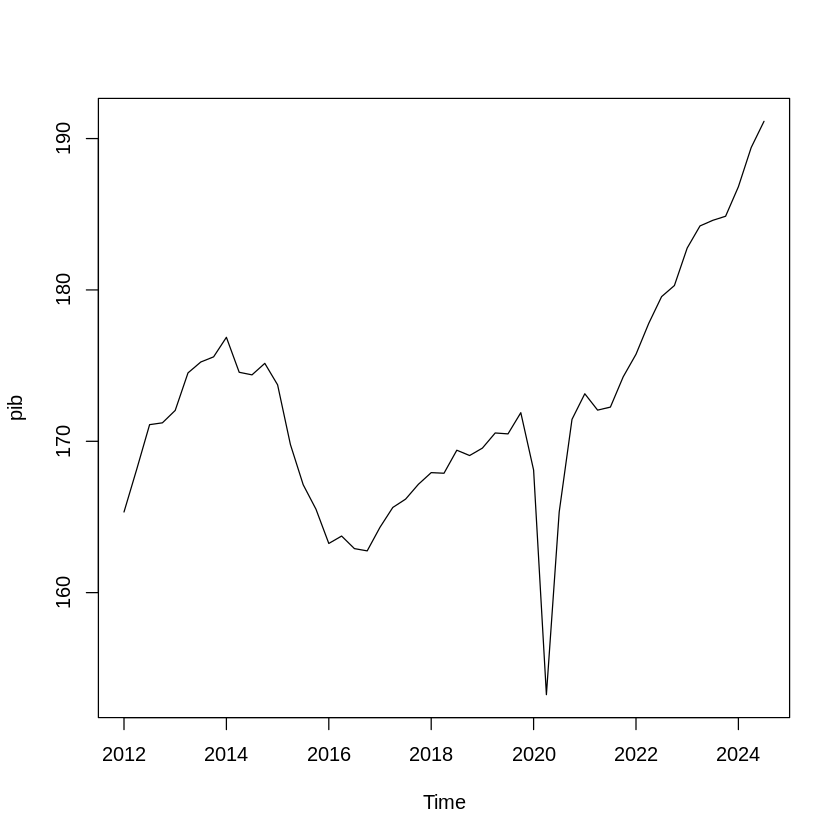

In [43]:
### Carregando os dados necessários para operacionalizar os modelos

ipca  = get_series( 433, start_date = '2012-01-01' )
ipca  = ts( ipca$`433`, start = c( 2012, 1 ), frequency = 12 )

consumofamilias  = get_series( 22100, start_date = '2012-01-01' )
consumofamilias  = ts( consumofamilias$`22100`, start = c( 2012, 1 ), frequency = 4 )

saldobalancacomercial  = get_series( 23087, start_date = '2012-01-01' )
saldobalancacomercial = ts(saldobalancacomercial$`23087`, start = c( 2012, 1 ), frequency = 4 )

fbkf = get_series( 22113, start_date = '2012-01-01' )
fbkf = ts(fbkf$`22113`, start = c( 2012, 1 ), frequency = 4 )

emprego = get_series( 24379, start_date = '2012-01-01' )
emprego = ts(emprego$`24379`, start = c( 2012, 1 ), frequency = 12 )

juros = get_series( 4391, start_date = '2012-01-01' )
juros = ts(juros$`4391`, start = c( 2012, 1 ), frequency = 12 )

pib = get_series( 22109, start_date = '2012-01-01' )
pib = ts(pib$`22109`, start = c( 2012, 1 ), frequency = 4 )


In [61]:
### Transformando as variáveis necessárias

empregotrimestral = ts(aggregate(emprego, nfrequency = 4, FUN = mean), start = c(2012, 1), frequency = 4)

jurostrimestral = ts(aggregate(juros, nfrequency = 4, FUN = mean), start = c(2012, 1), frequency = 4)

ipcatrimestral = ts(aggregate(ipca, nfrequency = 4, FUN = mean), start = c(2012, 1), frequency = 4)


          Qtr1      Qtr2      Qtr3      Qtr4
2012  88745.33  89839.33  90447.33  90259.00
2013  90106.67  91061.33  91681.33  91913.00
2014  91682.00  92076.67  92659.00  92671.00
2015  92094.33  92217.67  92291.33  91824.33
2016  90655.00  90360.00  89951.33  89720.00
2017  89209.67  90593.00  91631.67  91799.00
2018  91035.00  91912.00  93288.00  93076.00
2019  93200.33  94354.33  95063.00  95104.33
2020  89988.33  83122.00  85098.67  87241.33
2021  87569.33  90591.67  93954.67  95469.67
2022  96434.33  98649.33  99541.00  98709.33
2023  98085.33  99302.67 100184.00 100609.33
2024 100779.33 102126.00 103514.00          


In [71]:
### Fazendo o DataFrame da série

length(pib)
length(consumofamilias)
length(saldobalancacomercial)
length(fbkf)
length(empregotrimestral)
length(jurostrimestral)
ipca_trimestral <- window(ipcatrimestral, end = time(ipcatrimestral)[length(ipcatrimestral) - 1])
length(ipca_trimestral)

[1] 51

[1] 51

[1] 51

[1] 51

[1] 51

[1] 51

[1] 51

In [ ]:
data_series <- data.frame(
  Date = time(pib),
  PIB = as.numeric(pib),
  ConsumoFamilias = as.numeric(consumofamilias),
  SaldoBalançaComercial = as.numeric(saldobalancacomercial),
  FBKF = as.numeric(fbkf),
  Emprego = as.numeric(empregotrimestral),
  Juros = as.numeric(jurostrimestral),
  IPCA = as.numeric(ipca_trimestral)
)


In [ ]:
### Criando os gráficos para a série

# Criar data frames para as séries temporais
data_series <- data.frame(
  Date = time(pib),
  PIB = as.numeric(pib),
  ConsumoFamilias = as.numeric(consumofamilias),
  SaldoBalançaComercial = as.numeric(saldobalancacomercial),
  FBKF = as.numeric(fbkf),
  Emprego = as.numeric(empregotrimestral),
  Juros = as.numeric(jurostrimestral),
  IPCA = as.numeric(ipca_trimestral)
)

# Gráfico do PIB
ggplot(data_series, aes(x = Date, y = PIB)) +
  geom_line(color = "blue", size = 1) +
  ggtitle("Série Temporal do PIB") +
  xlab("Ano") +
  ylab("PIB") +
  theme_economist() +
  scale_color_economist() +
  theme(plot.title = element_text(hjust = 0.5))

# Gráfico do Emprego
ggplot(data_series, aes(x = Date, y = Emprego)) +
  geom_line(color = "green", size = 1) +
  ggtitle("Série Temporal do Emprego (Trimestral)") +
  xlab("Ano") +
  ylab("Emprego") +
  theme_wsj() +
  theme(plot.title = element_text(hjust = 0.5))

# Gráfico da Taxa de Juros
ggplot(data_series, aes(x = Date, y = Juros)) +
  geom_line(color = "red", size = 1) +
  ggtitle("Série Temporal da Taxa de Juros (Trimestral)") +
  xlab("Ano") +
  ylab("Taxa de Juros (%)") +
  theme_stata() +
  theme(plot.title = element_text(hjust = 0.5))

# Gráfico do IPCA
ggplot(data_series, aes(x = Date, y = IPCA)) +
  geom_line(color = "purple", size = 1) +
  ggtitle("Série Temporal do IPCA (Trimestral)") +
  xlab("Ano") +
  ylab("IPCA") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))


In [79]:
### Criando a primeira diferença para cada série de dados

data_series_diff <- data.frame(
  Date = tail(data_series$Date, -1),  # Ajustar o tempo para refletir a diferença
  PIB = diff(data_series$PIB),
  ConsumoFamilias = diff(data_series$ConsumoFamilias),
  SaldoBalançaComercial = diff(data_series$SaldoBalançaComercial),
  FBKF = diff(data_series$FBKF),
  Emprego = diff(data_series$Emprego),
  Juros = diff(data_series$Juros),
  IPCA = diff(data_series$IPCA)
)


      Date    PIB ConsumoFamilias SaldoBalançaComercial   FBKF     Emprego
1  2012.25   2.84            3.04                2282.5   0.26  1094.00000
2  2012.50   2.93            4.88                4015.0  -1.62   608.00000
3  2012.75   0.12            7.09               -5034.6   3.70  -188.33333
4  2013.00   0.82           -8.56               -8638.2   2.16  -152.33333
5  2013.25   2.48            3.63                7168.4  11.20   954.66667
6  2013.50   0.72            3.95                -811.8  -2.82   620.00000
7  2013.75   0.34            5.60                2923.0  -2.00   231.66667
8  2014.00   1.29           -6.95              -10045.3   0.68  -231.00000
9  2014.25  -2.31            0.13                9206.3  -8.64   394.66667
10 2014.50  -0.17            3.23               -1782.4  -4.38   582.33333
11 2014.75   0.76            8.87               -5294.7  -0.34    12.00000
12 2015.00  -1.42          -13.37               -1581.2  -5.57  -576.66667
13 2015.25  -3.94        

In [85]:
### Verificando a estacionariedade de cada uma delas

# Teste ADF para cada série diferenciada

# PIB
adf_pib = ur.df(data_series_diff$PIB, type = "drift", selectlags = "AIC")
summary(adf_pib)

# Consumo das Famílias
adf_consumo = ur.df(data_series_diff$ConsumoFamilias, type = "drift", selectlags = "AIC")
summary(adf_consumo)

# Saldo da Balança Comercial
adf_balanca = ur.df(data_series_diff$SaldoBalançaComercial, type = "drift", selectlags = "AIC")
summary(adf_balanca)

# Formação Bruta de Capital Fixo (FBKF)
adf_fbkf = ur.df(data_series_diff$FBKF, type = "drift", selectlags = "AIC")
summary(adf_fbkf)

# Emprego
adf_emprego = ur.df(data_series_diff$Emprego, type = "drift", selectlags = "AIC")
summary(adf_emprego)

# Taxa de Juros
adf_juros = ur.df(data_series_diff$Juros, type = "drift", selectlags = "AIC")
summary(adf_juros)

# IPCA
adf_ipca = ur.df(data_series_diff$IPCA, type = "drift", selectlags = "AIC")
summary(adf_ipca)



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0452  -0.4175   0.3792   1.1214  10.7352 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.5154     0.4823   1.068    0.291    
z.lag.1      -1.2186     0.2040  -5.973 3.42e-07 ***
z.diff.lag    0.2194     0.1446   1.517    0.136    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.282 on 45 degrees of freedom
Multiple R-squared:  0.5267,	Adjusted R-squared:  0.5056 
F-statistic: 25.04 on 2 and 45 DF,  p-value: 4.912e-08


Value of test-statistic is: -5.973 17.8398 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4986  -4.5349   0.4463   4.5312   9.9391 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.1531     0.9285   1.242    0.221    
z.lag.1      -1.8192     0.1816 -10.019 4.90e-13 ***
z.diff.lag    0.6047     0.1205   5.020 8.59e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.39 on 45 degrees of freedom
Multiple R-squared:  0.7193,	Adjusted R-squared:  0.7068 
F-statistic: 57.65 on 2 and 45 DF,  p-value: 3.853e-13


Value of test-statistic is: -10.0189 50.1934 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-12171.1  -4859.0   -163.3   5120.9  18447.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 459.4399   989.5821   0.464  0.64469    
z.lag.1      -1.9493     0.2159  -9.027 1.16e-11 ***
z.diff.lag    0.4615     0.1327   3.477  0.00114 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6838 on 45 degrees of freedom
Multiple R-squared:  0.7374,	Adjusted R-squared:  0.7257 
F-statistic: 63.17 on 2 and 45 DF,  p-value: 8.609e-14


Value of test-statistic is: -9.0269 40.7588 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.6494  -3.4263   0.2233   3.8561  18.2591 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.09420    1.08240  -0.087    0.931    
z.lag.1     -0.98493    0.20543  -4.795 1.82e-05 ***
z.diff.lag   0.04864    0.14966   0.325    0.747    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.491 on 45 degrees of freedom
Multiple R-squared:  0.4695,	Adjusted R-squared:  0.446 
F-statistic: 19.92 on 2 and 45 DF,  p-value: 6.378e-07


Value of test-statistic is: -4.7945 11.5023 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-5111.7  -394.2   -88.5   505.9  3692.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 220.9773   212.2819   1.041   0.3035    
z.lag.1      -0.8070     0.1539  -5.243 4.08e-06 ***
z.diff.lag    0.3495     0.1403   2.490   0.0165 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1446 on 45 degrees of freedom
Multiple R-squared:  0.3811,	Adjusted R-squared:  0.3536 
F-statistic: 13.85 on 2 and 45 DF,  p-value: 2.049e-05


Value of test-statistic is: -5.2427 13.7462 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.143138 -0.025349  0.009337  0.041230  0.100203 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.002759   0.008862   0.311   0.7570  
z.lag.1     -0.296171   0.111978  -2.645   0.0112 *
z.diff.lag   0.011003   0.146877   0.075   0.9406  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06135 on 45 degrees of freedom
Multiple R-squared:  0.1483,	Adjusted R-squared:  0.1105 
F-statistic: 3.919 on 2 and 45 DF,  p-value: 0.02697


Value of test-statistic is: -2.6449 3.5264 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22815 -0.14421  0.00533  0.14262  0.64974 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.003533   0.044397  -0.080    0.937    
z.lag.1     -1.897204   0.187858 -10.099 3.81e-13 ***
z.diff.lag   0.582850   0.121307   4.805 1.76e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3076 on 45 degrees of freedom
Multiple R-squared:  0.735,	Adjusted R-squared:  0.7233 
F-statistic: 62.42 on 2 and 45 DF,  p-value: 1.051e-13


Value of test-statistic is: -10.0991 51.0015 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94


AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      5      5      5 



VAR Estimation Results:
Endogenous variables: PIB, ConsumoFamilias, SaldoBalançaComercial, FBKF, Emprego, Juros, IPCA 
Deterministic variables: const 
Sample size: 45 
Log Likelihood: -629.33 
Roots of the characteristic polynomial:
1.005 1.005 1.004 1.004 0.997 0.9963 0.9963 0.9834 0.9834 0.9803 0.9803 0.9558 0.9558 0.9449 0.9449 0.9323 0.9323 0.9067 0.9067 0.8916 0.8916 0.8845 0.8845 0.8597 0.8597 0.852 0.852 0.8198 0.8198 0.7013 0.7013 0.6713 0.5401 0.4847 0.4847
Call:
VAR(y = var_data, p = var_lag$selection["AIC(n)"], type = "const")


Estimation results for equation PIB: 
PIB = PIB.l1 + ConsumoFamilias.l1 + SaldoBalançaComercial.l1 + FBKF.l1 + Emprego.l1 + Juros.l1 + IPCA.l1 + PIB.l2 + ConsumoFamilias.l2 + SaldoBalançaComercial.l2 + FBKF.l2 + Emprego.l2 + Juros.l2 + IPCA.l2 + PIB.l3 + ConsumoFamilias.l3 + SaldoBalançaComercial.l3 + FBKF.l3 + Emprego.l3 + Juros.l3 + IPCA.l3 + PIB.l4 + ConsumoFamilias.l4 + SaldoBalançaComercial.l4 + FBKF.l4 + Emprego.l4 + Juros.l4 + IPCA.l4 + PIB.l


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_model
Chi-squared = 612.12, df = 343, p-value < 2.2e-16

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_model
Chi-squared = 612.12, df = 343, p-value < 2.2e-16




	ARCH (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 1120, df = 3920, p-value = 1

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 1120, df = 3920, p-value = 1



$PIB
           fcst      lower      upper       CI
[1,] -2.1504379  -5.766359  1.4654830 3.615921
[2,]  2.5574175  -3.741039  8.8558740 6.298456
[3,] -6.4051982 -13.270711  0.4603142 6.865512
[4,]  2.1511399  -5.986518 10.2887974 8.137658
[5,]  0.7252459  -8.320040  9.7705322 9.045286

$ConsumoFamilias
          fcst      lower     upper        CI
[1,]  1.319982  -4.042662  6.682625  5.362644
[2,] -6.779857 -15.203578  1.643865  8.423721
[3,] -4.875777 -13.985135  4.233582  9.109358
[4,]  6.223970  -3.718310 16.166249  9.942280
[5,]  4.528305  -6.206648 15.263259 10.734953

$SaldoBalançaComercial
          fcst      lower      upper        CI
[1,]  5084.411  -2173.654 12342.4766  7258.065
[2,] -9356.622 -17717.634  -995.6087  8361.013
[3,] 12368.892   2426.835 22310.9489  9942.057
[4,] -8941.618 -21073.336  3190.0995 12131.718
[5,]  4913.217  -7905.254 17731.6886 12818.471

$FBKF
           fcst      lower     upper        CI
[1,]  -3.541211 -13.264197  6.181776  9.722986
[2,]   5.919

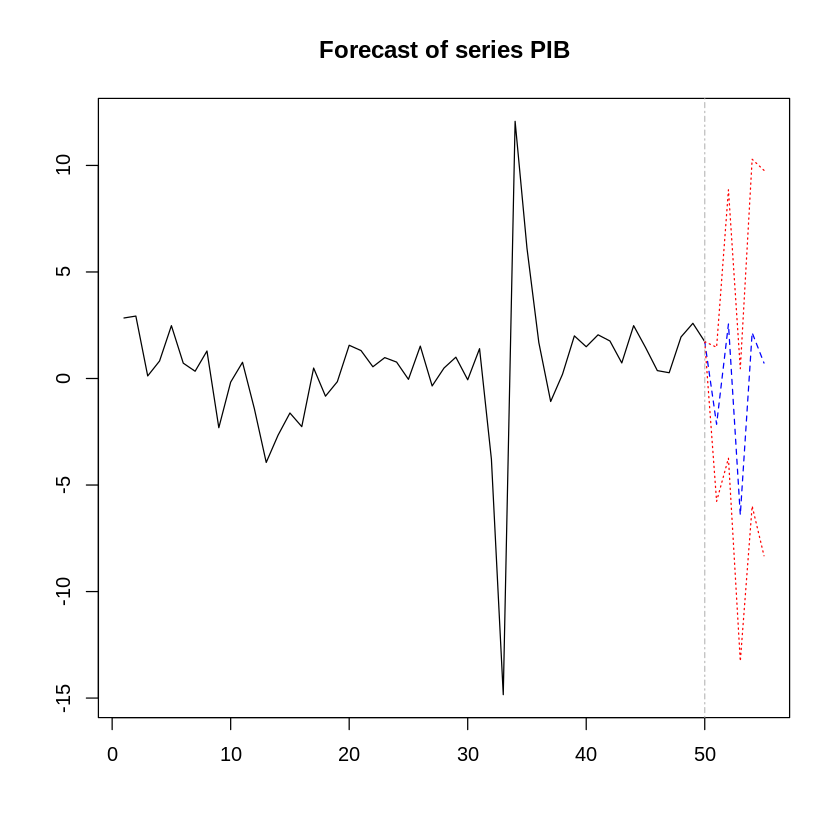

In [96]:
### Fazendo o modelo VAR em si

# Instalar e carregar o pacote necessário
if (!require("vars")) install.packages("vars")
library(vars)

# Criar o dataframe com as séries diferenciadas
var_data <- data.frame(
  PIB = data_series_diff$PIB,
  ConsumoFamilias = data_series_diff$ConsumoFamilias,
  SaldoBalançaComercial = data_series_diff$SaldoBalançaComercial,
  FBKF = data_series_diff$FBKF,
  Emprego = data_series_diff$Emprego,
  Juros = data_series_diff$Juros,
  IPCA = data_series_diff$IPCA
)

# Ajustar o modelo VAR (seleção da ordem baseada em critérios AIC, HQ, SC, FPE)
var_lag <- VARselect(var_data, lag.max = 5, type = "const")  # Teste até 8 defasagens
print(var_lag$selection)  # Mostrar a ordem selecionada

# Ajustar o modelo VAR com a ordem selecionada
var_model <- VAR(var_data, p = var_lag$selection["AIC(n)"], type = "const")
summary(var_model)

# Diagnóstico do modelo
serial.test(var_model, lags.pt = 12, type = "PT.asymptotic")  # Teste de autocorrelação
arch.test(var_model, lags.multi = 5)  # Teste ARCH para heterocedasticidade

# Previsões para 10 períodos à frente
forecast_var <- predict(var_model, n.ahead = 5)

# Visualizar as previsões do PIB
plot(forecast_var, names = "PIB")

print(forecast_var)

  Period Point_Forecast Variation
1      1     -2.1504379        NA
2      2      2.5574175  4.707855
3      3     -6.4051982 -8.962616
4      4      2.1511399  8.556338
5      5      0.7252459 -1.425894


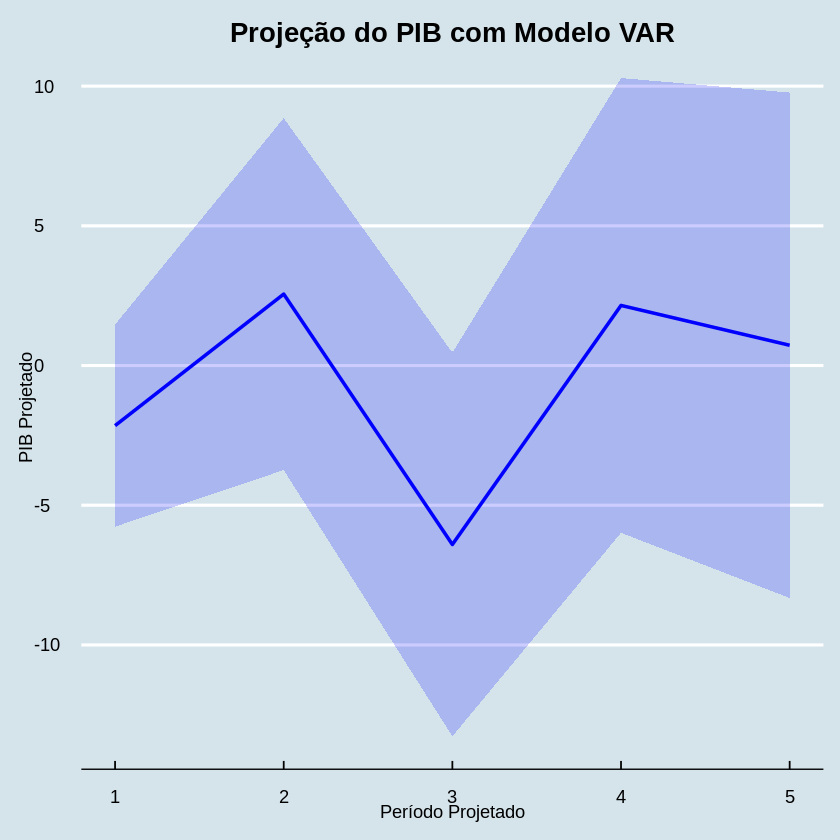

In [108]:
# Instalar e carregar pacotes necessários
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("ggthemes")) install.packages("ggthemes")
library(ggplot2)
library(ggthemes)

# Obter as previsões do PIB
forecast_pib <- forecast_var$fcst$PIB

# Criar um dataframe com as previsões
forecast_df <- data.frame(
  Period = seq_len(nrow(forecast_pib)),  # Número do período projetado
  Point_Forecast = forecast_pib[, "fcst"],  # Previsão pontual
  Lower_Bound = forecast_pib[, "lower"],    # Limite inferior do intervalo de confiança
  Upper_Bound = forecast_pib[, "upper"]     # Limite superior do intervalo de confiança
)

# Adicionar a variação percentual do PIB para cada período projetado
forecast_df$Variation <- c(NA, diff(forecast_df$Point_Forecast))  # Variação em relação ao período anterior

# Plotar a projeção do PIB com ggplot2 e ggthemes
ggplot(forecast_df, aes(x = Period)) +
  geom_line(aes(y = Point_Forecast), color = "blue", size = 1, linetype = "solid") +
  geom_ribbon(aes(ymin = Lower_Bound, ymax = Upper_Bound), alpha = 0.2, fill = "blue") +
  ggtitle("Projeção do PIB com Modelo VAR") +
  xlab("Período Projetado") +
  ylab("PIB Projetado") +
  theme_economist() +
  theme(plot.title = element_text(hjust = 0.5))

# Mostrar a tabela com a variação do PIB para cada período
print(forecast_df[, c("Period", "Point_Forecast", "Variation")])


In [109]:
print(forecast_var)

$PIB
           fcst      lower      upper       CI
[1,] -2.1504379  -5.766359  1.4654830 3.615921
[2,]  2.5574175  -3.741039  8.8558740 6.298456
[3,] -6.4051982 -13.270711  0.4603142 6.865512
[4,]  2.1511399  -5.986518 10.2887974 8.137658
[5,]  0.7252459  -8.320040  9.7705322 9.045286

$ConsumoFamilias
          fcst      lower     upper        CI
[1,]  1.319982  -4.042662  6.682625  5.362644
[2,] -6.779857 -15.203578  1.643865  8.423721
[3,] -4.875777 -13.985135  4.233582  9.109358
[4,]  6.223970  -3.718310 16.166249  9.942280
[5,]  4.528305  -6.206648 15.263259 10.734953

$SaldoBalançaComercial
          fcst      lower      upper        CI
[1,]  5084.411  -2173.654 12342.4766  7258.065
[2,] -9356.622 -17717.634  -995.6087  8361.013
[3,] 12368.892   2426.835 22310.9489  9942.057
[4,] -8941.618 -21073.336  3190.0995 12131.718
[5,]  4913.217  -7905.254 17731.6886 12818.471

$FBKF
           fcst      lower     upper        CI
[1,]  -3.541211 -13.264197  6.181776  9.722986
[2,]   5.919

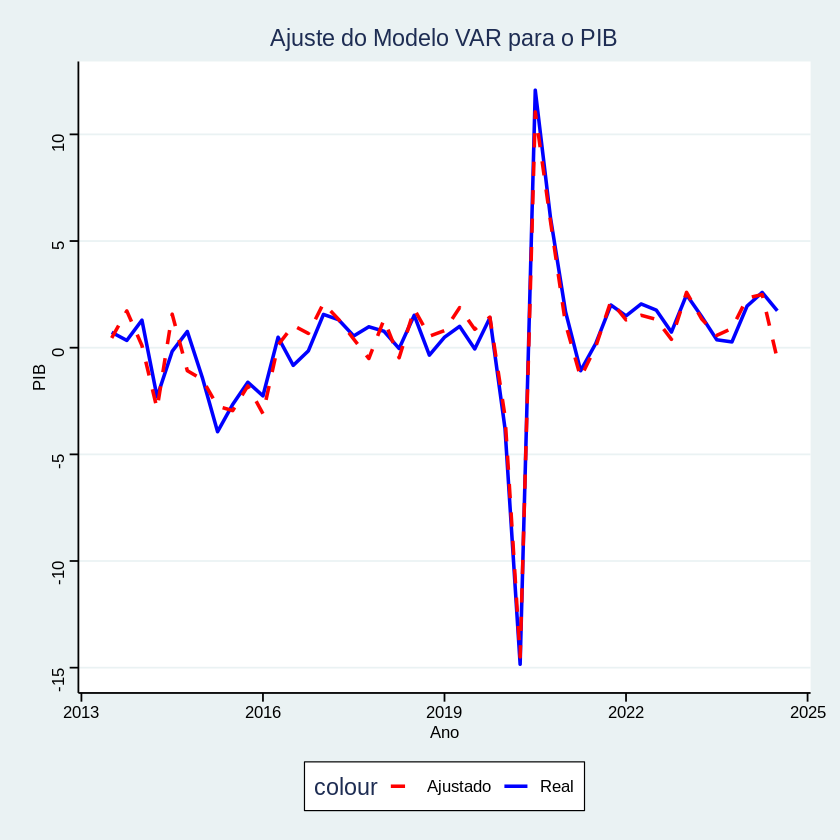

In [111]:
# Obter os valores ajustados pelo modelo VAR
fitted_values <- fitted(var_model)[, "PIB"]  # Acessar os valores ajustados do PIB diretamente pela coluna
actual_values <- var_data$PIB  # Valores reais do PIB

# Criar um dataframe para o gráfico
fit_df <- data.frame(
  Date = tail(data_series$Date, length(fitted_values)),  # Datas correspondentes aos valores ajustados
  Actual = tail(actual_values, length(fitted_values)),  # Valores reais alinhados com os ajustados
  Fitted = fitted_values  # Valores ajustados
)

# Criar o gráfico de ajuste do modelo
library(ggplot2)
library(ggthemes)

ggplot(fit_df, aes(x = Date)) +
  geom_line(aes(y = Actual, color = "Real"), size = 1) +
  geom_line(aes(y = Fitted, color = "Ajustado"), linetype = "dashed", size = 1) +
  ggtitle("Ajuste do Modelo VAR para o PIB") +
  xlab("Ano") +
  ylab("PIB") +
  scale_color_manual(values = c("Real" = "blue", "Ajustado" = "red")) +
  theme_stata() +
  theme(plot.title = element_text(hjust = 0.5))


In [140]:
### Estimando via VECm

# Realizar o teste de cointegração de Johansen
johansen_test <- ca.jo(var_data, type = "trace", K = 2, ecdet = "const", spec = "transitory")
summary(johansen_test)



###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1]  8.611574e-01  7.931458e-01  7.116277e-01  5.040095e-01  4.399047e-01
[6]  2.814275e-01  1.978974e-01 -6.458477e-17

Values of teststatistic and critical values of test:

           test  10pct   5pct   1pct
r <= 6 |  10.58   7.52   9.24  12.97
r <= 5 |  26.45  17.85  19.96  24.60
r <= 4 |  54.27  32.00  34.91  41.07
r <= 3 |  87.93  49.65  53.12  60.16
r <= 2 | 147.62  71.86  76.07  84.45
r <= 1 | 223.25  97.18 102.14 111.01
r = 0  | 318.02 126.58 131.70 143.09

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                                PIB.l1 ConsumoFamilias.l1
PIB.l1                    1.0000000000       1.000000e+00
ConsumoFamilias.l1       -1.3351649038      -9.785702e-01
SaldoBalançaComercial.l1  0.0002838705      -5.145278e-05
FBKF.l1                   0.0975502

In [113]:
# Ajustar o modelo VECM com o número de vetores de cointegração selecionados (r)
vecm_model <- cajorls(johansen_test, r = 1)  # Ajustar com 1 vetor de cointegração (ajuste conforme necessário)
summary(vecm_model)


     Length Class  Mode   
rlm  12     mlm    list   
beta  8     -none- numeric

   Period PIB_Projected
1       1      192.0399
2       2      192.0822
3       3      192.4513
4       4      193.9850
5       5      194.9339
6       6      194.9521
7       7      195.5355
8       8      196.9358
9       9      197.7460
10     10      197.8855


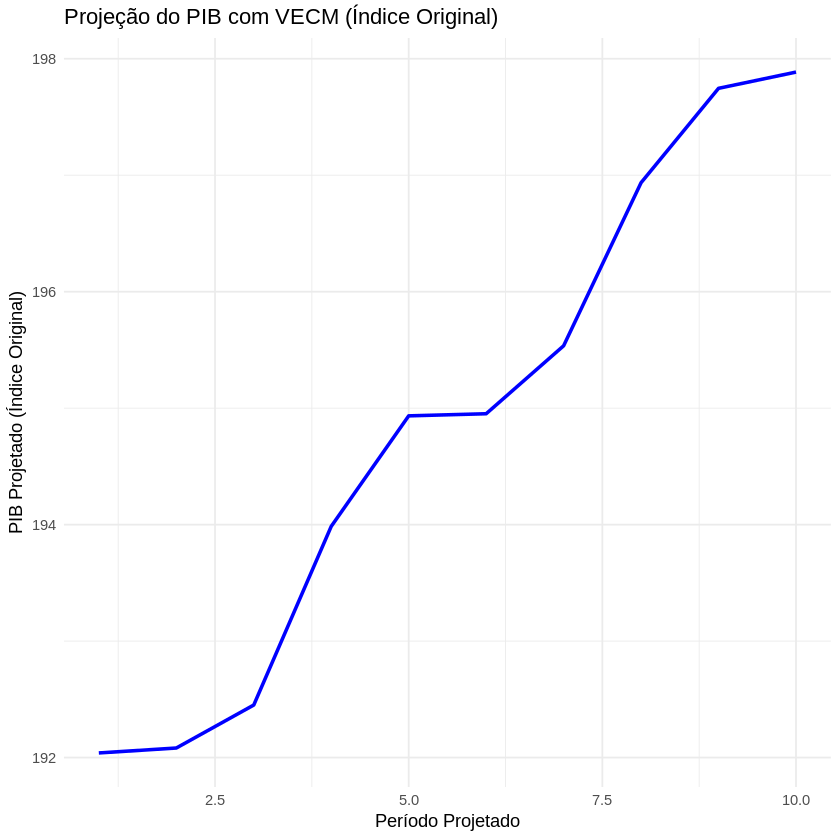

In [114]:
# Converter o VECM para um VAR para fazer previsões
vecm_as_var <- vec2var(johansen_test, r = 1)

# Previsões para 10 períodos à frente
forecast_vecm <- predict(vecm_as_var, n.ahead = 10)

# Recuperar as projeções do PIB (diferenciado)
forecast_diff_vecm <- forecast_vecm$fcst$PIB[, "fcst"]

# Recuperar o PIB original projetado
last_pib_original <- tail(data_series$PIB, 1)
forecast_pib_original_vecm <- cumsum(c(last_pib_original, forecast_diff_vecm))[-1]

# Criar um dataframe com as projeções do PIB original
forecast_df_vecm <- data.frame(
  Period = 1:length(forecast_pib_original_vecm),
  PIB_Projected = forecast_pib_original_vecm
)

# Visualizar as projeções
print(forecast_df_vecm)

# Plotar as projeções do PIB no índice original
library(ggplot2)
ggplot(forecast_df_vecm, aes(x = Period, y = PIB_Projected)) +
  geom_line(color = "blue", size = 1) +
  ggtitle("Projeção do PIB com VECM (Índice Original)") +
  xlab("Período Projetado") +
  ylab("PIB Projetado (Índice Original)") +
  theme_minimal()


   Period PIB_Projected
1       1      192.0399
2       2      192.0822
3       3      192.4513
4       4      193.9850
5       5      194.9339
6       6      194.9521
7       7      195.5355
8       8      196.9358
9       9      197.7460
10     10      197.8855


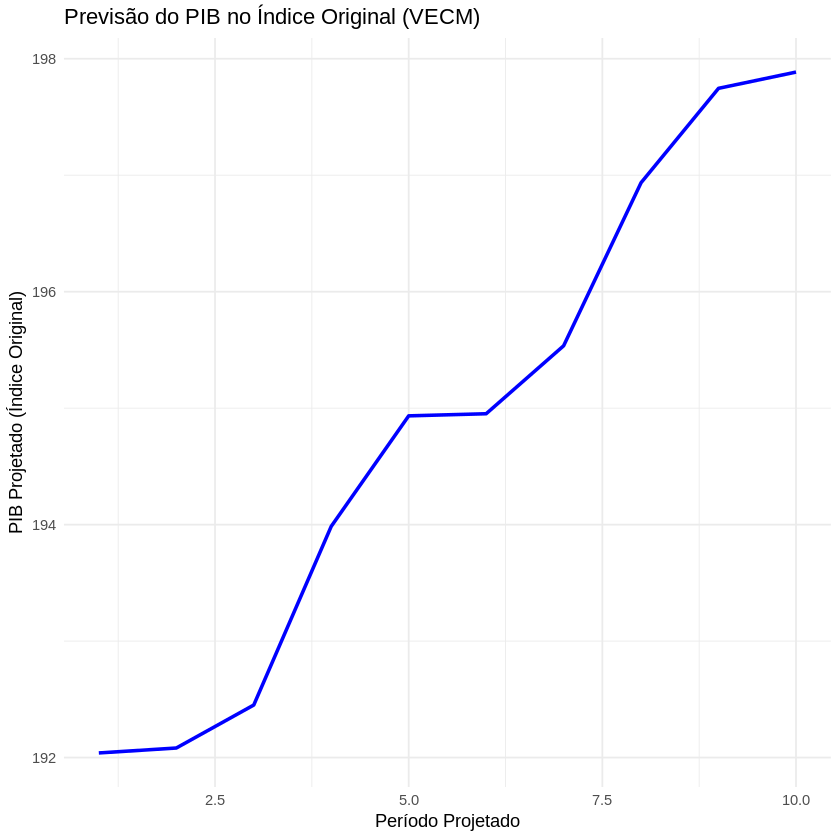

In [116]:
# Último valor conhecido do PIB no índice original
last_pib_original <- tail(data_series$PIB, 1)

# Diferenças projetadas pelo modelo VECM (fcst contém as variações projetadas)
forecast_diff_vecm <- forecast_vecm$fcst$PIB[, "fcst"]

# Recuperar os valores projetados do PIB original (acumulando as variações)
forecast_pib_original_vecm <- cumsum(c(last_pib_original, forecast_diff_vecm))[-1]  # Remove o primeiro valor inicial repetido

# Criar um dataframe com as projeções do PIB no índice original
forecast_df_pib <- data.frame(
  Period = 1:length(forecast_pib_original_vecm),
  PIB_Projected = forecast_pib_original_vecm
)

# Visualizar as projeções do PIB original
print(forecast_df_pib)

# Plotar a previsão do PIB no índice original
library(ggplot2)

ggplot(forecast_df_pib, aes(x = Period, y = PIB_Projected)) +
  geom_line(color = "blue", size = 1) +
  ggtitle("Previsão do PIB no Índice Original (VECM)") +
  xlab("Período Projetado") +
  ylab("PIB Projetado (Índice Original)") +
  theme_minimal()



Warning message in forecast_diff_vecm/forecast_pib_original_vecm[-length(forecast_pib_original_vecm)]:
“longer object length is not a multiple of shorter object length”


   Period Percent_Change
1       1     0.46858702
2       2     0.02201108
3       3     0.19181378
4       4     0.79063015
5       5     0.48676958
6       6     0.00933066
7       7     0.29838816
8       8     0.71105122
9       9     0.40968716
10     10     0.07264864


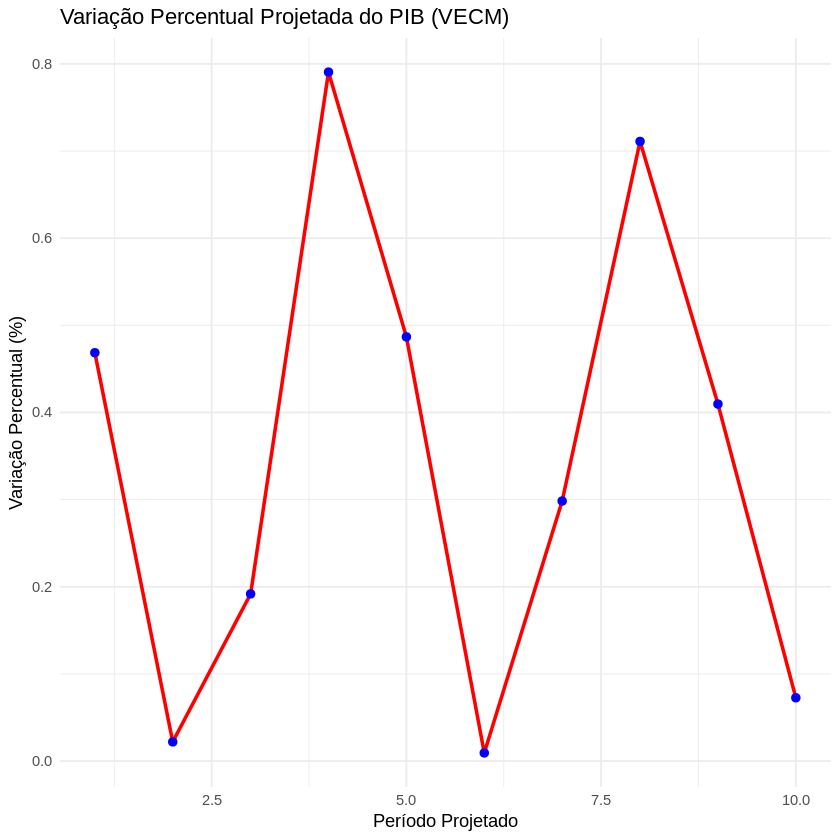

In [117]:
# Último valor conhecido do PIB no índice original
last_pib_original <- tail(data_series$PIB, 1)

# Diferenças projetadas pelo modelo VECM (fcst contém as variações projetadas)
forecast_diff_vecm <- forecast_vecm$fcst$PIB[, "fcst"]

# Recuperar o PIB original projetado (acumulando as variações)
forecast_pib_original_vecm <- cumsum(c(last_pib_original, forecast_diff_vecm))[-1]

# Calcular a variação percentual projetada
forecast_variation_percent <- (forecast_diff_vecm / forecast_pib_original_vecm[-length(forecast_pib_original_vecm)]) * 100

# Criar um dataframe com as variações percentuais projetadas
forecast_df_percent <- data.frame(
  Period = 1:length(forecast_variation_percent),
  Percent_Change = forecast_variation_percent
)

# Visualizar as variações percentuais projetadas
print(forecast_df_percent)

# Plotar a variação percentual projetada
library(ggplot2)

ggplot(forecast_df_percent, aes(x = Period, y = Percent_Change)) +
  geom_line(color = "red", size = 1) +
  geom_point(color = "blue", size = 2) +
  ggtitle("Variação Percentual Projetada do PIB (VECM)") +
  xlab("Período Projetado") +
  ylab("Variação Percentual (%)") +
  theme_minimal()


In [122]:
# Verificar a estrutura do modelo convertido para VAR
str(vecm_as_var)

# Verificar os nomes das variáveis nos resíduos
colnames(residuals(vecm_as_var))

# Exibir os primeiros valores para identificar problemas
head(residuals(vecm_as_var))


List of 12
 $ deterministic: num [1:7, 1] 0.04147 0.32775 -60.89478 -0.00774 24.52434 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "PIB" "ConsumoFamilias" "SaldoBalançaComercial" "FBKF" ...
  .. ..$ : chr "constant"
 $ A            :List of 2
  ..$ A1: num [1:7, 1:7] 0.895 1.681 701.177 0.247 94.683 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:7] "PIB" "ConsumoFamilias" "SaldoBalançaComercial" "FBKF" ...
  .. .. ..$ : chr [1:7] "PIB.l1" "ConsumoFamilias.l1" "SaldoBalançaComercial.l1" "FBKF.l1" ...
  ..$ A2: num [1:7, 1:7] 3.28e-01 8.06e-02 -1.03e+03 -2.89e-01 3.71e+01 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:7] "PIB" "ConsumoFamilias" "SaldoBalançaComercial" "FBKF" ...
  .. .. ..$ : chr [1:7] "PIB.l2" "ConsumoFamilias.l2" "SaldoBalançaComercial.l2" "FBKF.l2" ...
 $ p            : int 2
 $ K            : int 7
 $ y            : num [1:50, 1:7] 2.84 2.93 0.12 0.82 2.48 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. .

[1] "resids of PIB"                   "resids of ConsumoFamilias"      
[3] "resids of SaldoBalançaComercial" "resids of FBKF"                 
[5] "resids of Emprego"               "resids of Juros"                
[7] "resids of IPCA"

resids of PIB,resids of ConsumoFamilias,resids of SaldoBalançaComercial,resids of FBKF,resids of Emprego,resids of Juros,resids of IPCA
-2.2861968,2.767468,-7071.2070,6.783586,-595.17591,4.785908e-05,-0.061743074
2.1262353,-1.022485,-5132.6919,4.484582,1497.30117,5.576957e-02,0.009643695
2.4643817,2.252056,1976.0989,7.380137,-49.88136,6.638656e-02,0.010242403
0.9382115,2.097993,8042.2090,-6.420295,215.72248,2.970792e-02,0.065821701
-3.5709500,-3.334081,926.1931,-7.484459,-708.26432,4.749572e-03,0.166729874
1.3407187,1.550369,-9455.6429,1.749042,271.15095,-4.728459e-02,-0.006451174


[1] "resids of PIB"                   "resids of ConsumoFamilias"      
[3] "resids of SaldoBalançaComercial" "resids of FBKF"                 
[5] "resids of Emprego"               "resids of Juros"                
[7] "resids of IPCA"

Warning message in actual_pib - vecm_residuals[, "resids of PIB"]:
“longer object length is not a multiple of shorter object length”


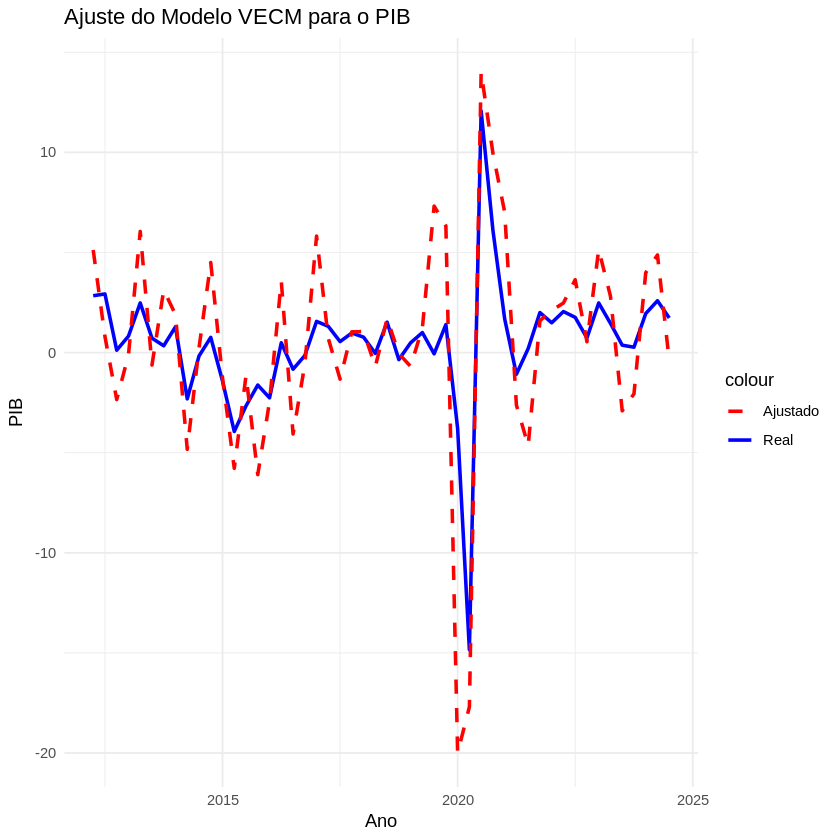

In [126]:
# Garantir que a variável PIB esteja acessível pelo nome correto
# Ajuste o nome se "PIB" não estiver identificado corretamente
vecm_residuals <- residuals(vecm_as_var)

# Verificar os nomes das colunas
colnames(vecm_residuals)

# Define actual_pib using the original PIB data from data_series
actual_pib <- var_data$PIB  # Add this line to define actual_pib

# Ajustar os valores do PIB com base nos resíduos
fitted_pib <- actual_pib - vecm_residuals[, "resids of PIB"]  # Substitua "PIB" pelo nome correto, se necessário

# Criar o dataframe para o gráfico
fit_df_vecm <- data.frame(
  Date = tail(data_series$Date, length(fitted_pib)),
  Actual = actual_pib,
  Fitted = fitted_pib
)

# Criar o gráfico
library(ggplot2)

ggplot(fit_df_vecm, aes(x = Date)) +
  geom_line(aes(y = Actual, color = "Real"), size = 1) +
  geom_line(aes(y = Fitted, color = "Ajustado"), linetype = "dashed", size = 1) +
  ggtitle("Ajuste do Modelo VECM para o PIB") +
  xlab("Ano") +
  ylab("PIB") +
  scale_color_manual(values = c("Real" = "blue", "Ajustado" = "red")) +
  theme_minimal()